In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Step 1: Install Required Libraries
!pip install pandas openpyxl

# Step 2: Upload an Excel File to Google Colab
from google.colab import files

print("Please upload your Excel file:")
data = files.upload()  # Prompt the user to upload the Excel file

Please upload your Excel file:


Saving StudentPerformanceFactors.csv to StudentPerformanceFactors (2).csv


In [17]:
data

{'StudentPerformanceFactors (2).csv': b'Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score\r\n23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67\r\n19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61\r\n24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74\r\n29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71\r\n19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70\r\n19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71\r\n29,84,Medium,Low

**Description**

This dataset provides a comprehensive overview of various factors affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.

**Column Descriptions**

**Hours_Studied**: Number of hours spent studying per week.
Attendance: Percentage of classes attended.

**Parental_Involvement**: Level of parental involvement in the student's education (Low, Medium, High).

**Access_to_Resources**: Availability of educational resources (Low, Medium, High).

**Extracurricular_Activities**: Participation in extracurricular activities (Yes, No).

**Sleep_Hours**: Average number of hours of sleep per night.

**Previous_Scores**: Scores from previous exams.

**Motivation_Level**: Student's level of motivation (Low, Medium, High).

**Internet_Access**: Availability of internet access (Yes, No).

**Tutoring_Sessions**: Number of tutoring sessions attended per month.

**Family_Income**: Family income level (Low, Medium, High).

**Teacher_Quality**: Quality of the teachers (Low, Medium, High).

**School_Type**: Type of school attended (Public, Private).

**Peer_Influence**: Influence of peers on academic performance (Positive, Neutral, Negative).

**Physical_Activity**: Average number of hours of physical activity per week.

**Learning_Disabilities**: Presence of learning disabilities (Yes, No).

**Parental_Education_Level**: Highest education level of parents (High School, College, Postgraduate).

**Distance_from_Home**: Distance from home to school (Near, Moderate, Far).

**Gender**: Gender of the student (Male, Female).

**Exam_Score**: Final exam score.

In [19]:
import pandas as pd
import io

# Get the first key in the data dictionary (assuming it's the filename)
filename = list(data.keys())[0]

# Read the CSV file content using the filename
data = pd.read_csv(io.BytesIO(data[filename]))

# Now you can use data.isna().sum()
data.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [21]:
data.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


This dataset has missing values

In [22]:
data.dropna(subset=['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], inplace=True)

In [23]:
data.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


So the missing value problem has been solved

In [24]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity, and Exam_Score:

	•	Count: Each of these columns has 6607 entries, meaning there are no missing values in these numerical columns.
	•	Mean: The average values for these columns, e.g., the average Hours_Studied is approximately 20 hours.
	•	Standard Deviation (std): Shows the spread of the data, e.g., Previous_Scores have a std of 14.4, indicating some variability in scores.
	•	Min/Max: Provides the range of values, e.g., Exam_Score ranges from 55 to 101, indicating potential outliers or errors since scores should typically not exceed 100.
	•	Percentiles (25%, 50%, 75%): Indicates the distribution of the data, helping me understand how the values are spread out.

The presence of an Exam_Score exceeding 100 suggests there may be data entry errors or outliers that I need to investigate further.

In [25]:
rows_exceeding_100 = data[data['Exam_Score'] > 100]
rows_exceeding_100

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


In [26]:
data.loc[data['Exam_Score'] > 100, 'Exam_Score'] = 100

In [27]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.251960
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.912884
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,100.000000


Now the problem is fixed

In [28]:
average_scores_by_gender = data.groupby('Gender')['Exam_Score'].mean()
average_scores_by_gender

,Exam_Score
Gender,
Female,67.274349
Male,67.235629


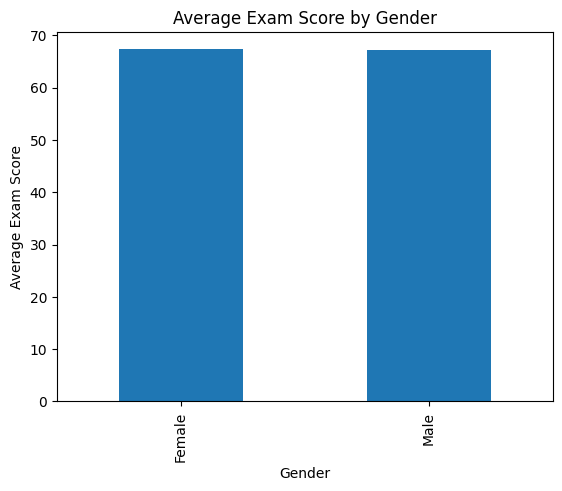

In [29]:
average_scores_by_gender.plot(kind='bar')

plt.title('Average Exam Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Exam Score')
plt.show()

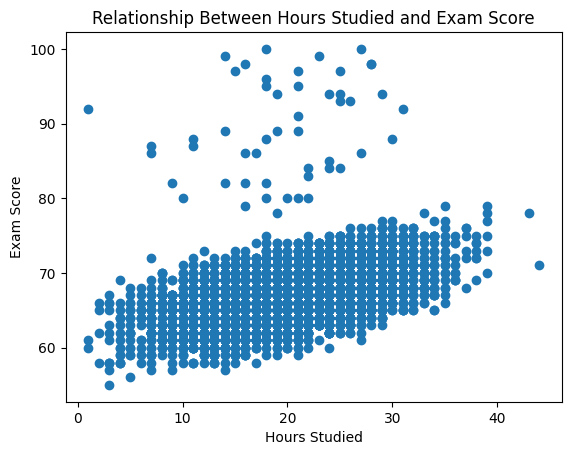

In [30]:
plt.scatter(data['Hours_Studied'], data['Exam_Score'])
plt.title('Relationship Between Hours Studied and Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

In [31]:
high_score_low_hours = data[(data['Hours_Studied'] <= 1) & (data['Exam_Score'] >= 90)]
high_score_low_hours

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
4779,1,88,Medium,High,Yes,4,72,High,Yes,3,Medium,Medium,Private,Negative,2,No,College,Near,Male,92


So this is very interesting. Here is a student who studied 1 hour in the whole week and got 92 in the exam. I was curious to see the stat of this guy. Its a male student with an attendance score of 88/100, which is very good. He has high access to resource, very good with extra curricular activities with high motivation level. However he is getting 4 hours of sleep which is the lowest out of all the students. He has internet access which is expected has 3 tutoring sessions and medium teacher quality.

In [32]:
high_hour_studies = data[(data['Hours_Studied'] >= 35)]
high_hour_studies.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,36.647059,81.000000,6.960784,76.843137,1.490196,3.000000,72.529412
std,1.998235,11.496086,1.427736,14.947070,1.254951,1.077033,3.177124
min,35.000000,61.000000,4.000000,51.000000,0.000000,1.000000,66.000000
25%,35.000000,70.000000,6.000000,63.000000,1.000000,2.000000,70.000000
50%,36.000000,83.000000,7.000000,77.000000,1.000000,3.000000,72.000000
75%,38.000000,90.000000,8.000000,90.500000,2.000000,4.000000,75.000000
max,44.000000,99.000000,10.000000,99.000000,6.000000,5.000000,79.000000


So those students who studied for more than 35 hours in a week got less than 80% marks in the exam score. Now they didnt do very bad though as the min score is 66 percent. Their attendacne is very high with an average of over 80%. So these are the geek or nerd or bookworm however it seems like they are not very bright when it comes to exams. Its very interesting.

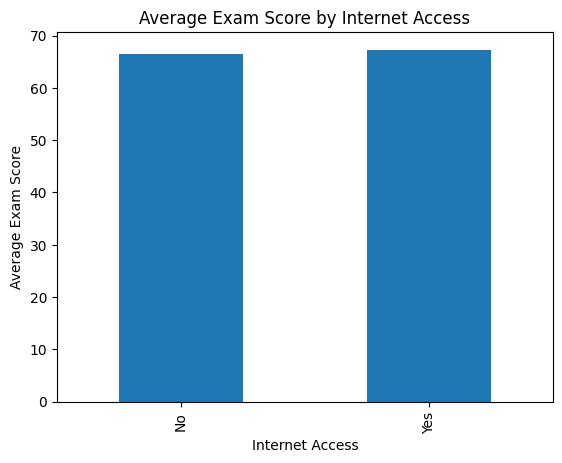

In [33]:
average_score_by_internet_access = data.groupby('Internet_Access')['Exam_Score'].mean()

average_score_by_internet_access.plot(kind='bar')

plt.title('Average Exam Score by Internet Access')
plt.xlabel('Internet Access')
plt.ylabel('Average Exam Score')
plt.show()

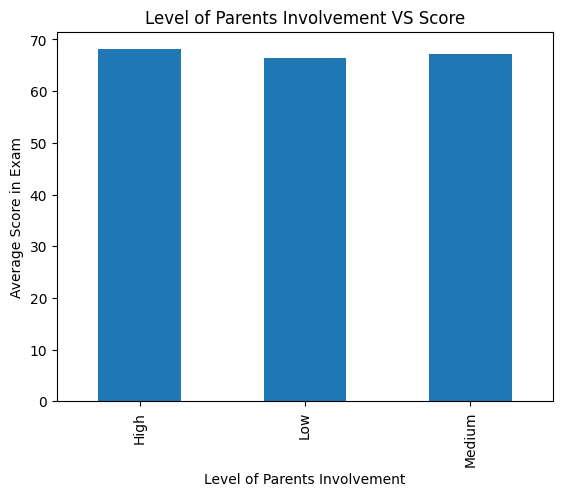

In [34]:
parents_involvement_and_score = data.groupby('Parental_Involvement')['Exam_Score'].mean()

parents_involvement_and_score.plot(kind = 'bar')
plt.title('Level of Parents Involvement VS Score')
plt.xlabel('Level of Parents Involvement')
plt.ylabel('Average Score in Exam')
plt.show()

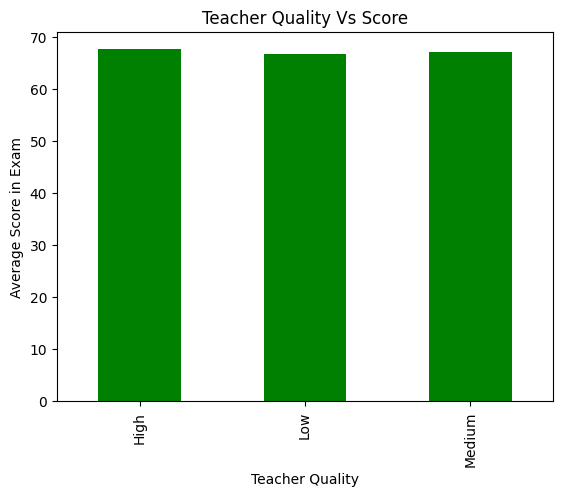

In [35]:
Teacher_Quality_and_score = data.groupby('Teacher_Quality')['Exam_Score'].mean()

Teacher_Quality_and_score.plot(kind = 'bar', color = 'green')
plt.title('Teacher Quality Vs Score')
plt.xlabel('Teacher Quality')
plt.ylabel('Average Score in Exam')
plt.show()

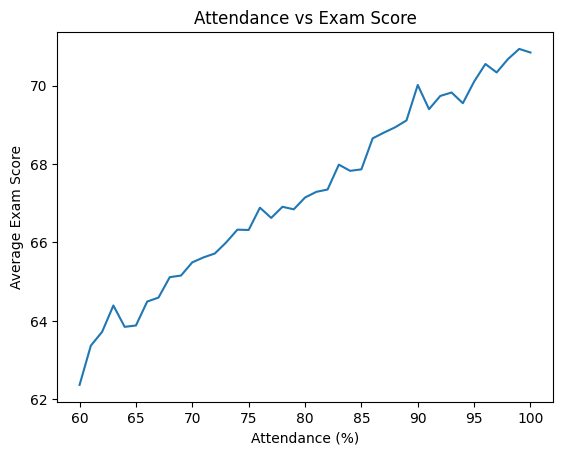

In [36]:
attendance_vs_score = data.groupby('Attendance')['Exam_Score'].mean()

attendance_vs_score.plot(kind='line')
plt.title('Attendance vs Exam Score')
plt.xlabel('Attendance (%)')
plt.ylabel('Average Exam Score')
plt.show()

So here we can see a clear pattern. The higher the attendace percentage the higher the exam score

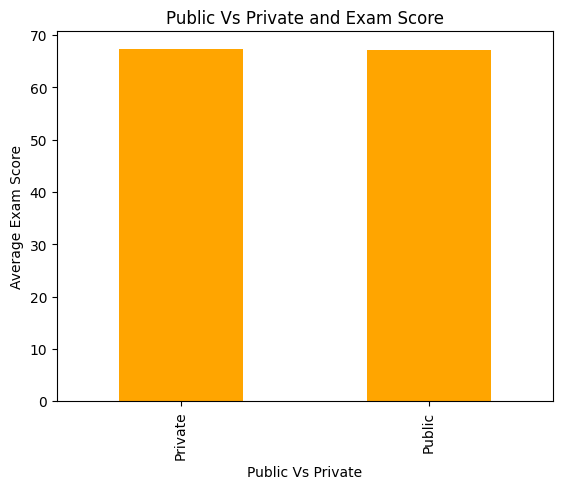

In [37]:
public_vs_private = data.groupby('School_Type')['Exam_Score'].mean()

public_vs_private.plot(kind='bar', color = 'orange')
plt.title('Public Vs Private and Exam Score')
plt.xlabel('Public Vs Private')
plt.ylabel('Average Exam Score')
plt.show()

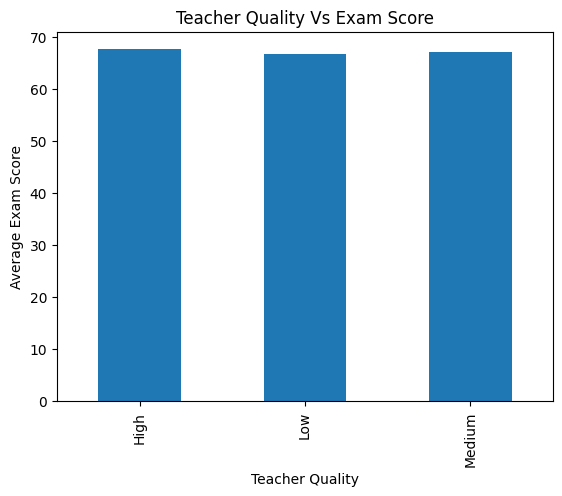

In [38]:
teacher_quality = data.groupby('Teacher_Quality')['Exam_Score'].mean()

teacher_quality.plot(kind='bar')
plt.title('Teacher Quality Vs Exam Score')
plt.xlabel('Teacher Quality')
plt.ylabel('Average Exam Score')
plt.show()

In [39]:
# Mapping categorical values to numerical ones
data['Parental_Involvement_Num'] = data['Parental_Involvement'].map({'Low': 1, 'Medium': 2, 'High': 3})
data['Motivation_Level_Num'] = data['Motivation_Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
data['Access_to_Resources_Num'] = data['Access_to_Resources'].map({'Low': 1, 'Medium': 2, 'High': 3})

# Now, you can perform the groupby and mean calculations
parental_involvement_by_gender = data.groupby('Gender')['Parental_Involvement_Num'].mean()
motivation_level_by_gender = data.groupby('Gender')['Motivation_Level_Num'].mean()
access_to_resources_by_gender = data.groupby('Gender')['Access_to_Resources_Num'].mean()

# Display the results
print("Parental Involvement by Gender:")
print(parental_involvement_by_gender)

print("\nMotivation Level by Gender:")
print(motivation_level_by_gender)

print("\nAccess to Resources by Gender:")
print(access_to_resources_by_gender)

Parental Involvement by Gender:
Gender
Female    2.098885
Male      2.075651
Name: Parental_Involvement_Num, dtype: float64

Motivation Level by Gender:
Gender
Female    1.895539
Male      1.917028
Name: Motivation_Level_Num, dtype: float64

Access to Resources by Gender:
Gender
Female    2.096283
Male      2.099512
Name: Access_to_Resources_Num, dtype: float64


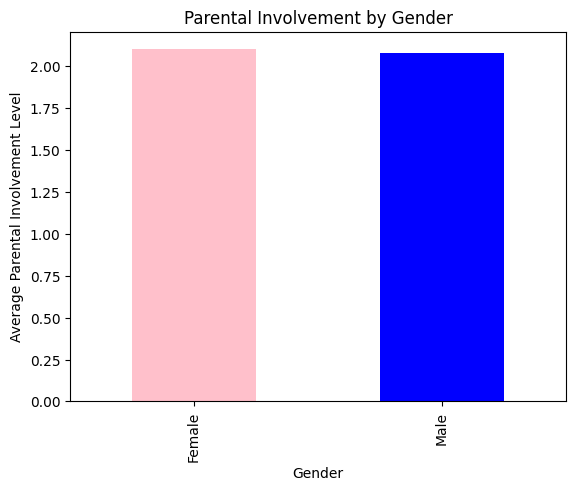

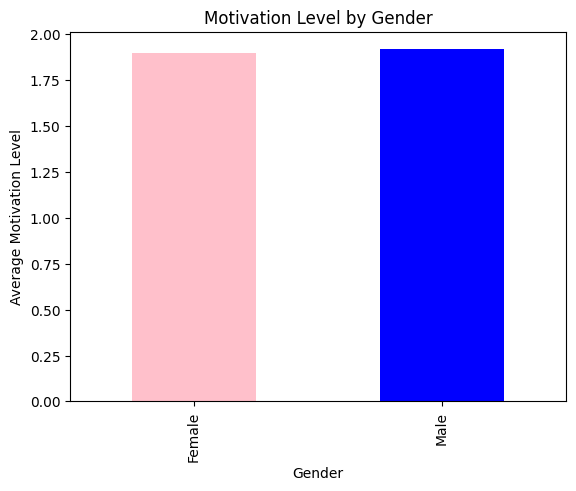

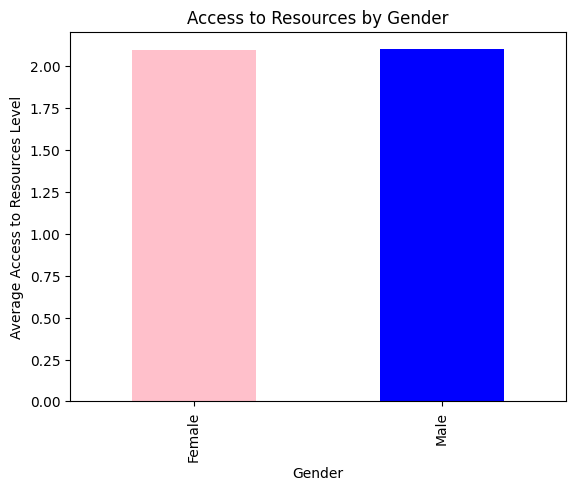

In [40]:
# Plotting Parental Involvement by Gender
parental_involvement_by_gender.plot(kind='bar', color=['pink', 'blue'])
plt.title('Parental Involvement by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Parental Involvement Level')
plt.show()

# Plotting Motivation Level by Gender
motivation_level_by_gender.plot(kind='bar', color=['pink', 'blue'])
plt.title('Motivation Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Motivation Level')
plt.show()

# Plotting Access to Resources by Gender
access_to_resources_by_gender.plot(kind='bar', color=['pink', 'blue'])
plt.title('Access to Resources by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Access to Resources Level')
plt.show()

In [41]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Parental_Involvement_Num,Motivation_Level_Num,Access_to_Resources_Num
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Positive,3,No,High School,Near,Male,67,1,1,3
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Negative,4,No,College,Moderate,Female,61,1,1,2
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Neutral,4,No,Postgraduate,Near,Male,74,2,2,2
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Negative,4,No,High School,Moderate,Male,71,1,2,2
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,Neutral,4,No,College,Near,Female,70,2,2,2


**Final Thought**

So it seems that other than hours studied and attendance percentage other factors do not really affect the final exam score that much.

Now for attendance, it is pretty self-explanatory. The students who attended more classes got more marks.

However, the most interesting part is the relationship between hours studied and exam scores. it is not exactly an upward curve. The students who studied between 5 to 30 hours a week got the highest marks. Now there is one student who got 92 marks in the exam by studying just 1 hour in a week. However, he is very good in other aspects of life so I got the idea of how he did it.

Now those who studied more than 35+ hours in a week all got less than 80 marks. Their average score is somewhat good but it seems that none of them could score very high marks just by studying more hours. So here there is a direct negative relation.